<a href="https://colab.research.google.com/github/DamodaraBarbosa/machine_learning_studies/blob/main/Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
sns.set()

# Loading dataset

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Kaggle/breast-cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Dataset description

From Kaggle: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it’s detection is how to classify tumors into malignant (cancerous) or benign(non cancerous). We ask you to complete the analysis of classifying these tumors using machine learning (with SVMs) and the Breast Cancer Wisconsin (Diagnostic) Dataset.

Acknowledgements:
This dataset has been referred from Kaggle.

Objective:
* Understand the Dataset & cleanup (if required).
* Build classification models to predict whether the cancer type is Malignant or Benign.
* Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms.


## Data info

In [72]:
data.shape

(569, 32)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

There is no missing values in this dataset.

# Descriptive analysis

In [ ]:
data.describe().round(2)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,3.037183e+07,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,...,16.27,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08
std,1.250206e+08,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,...,4.83,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02
min,8.670000e+03,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,...,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06
25%,8.692180e+05,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,...,13.01,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07
50%,9.060240e+05,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,...,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08
75%,8.813129e+06,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,...,18.79,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09
max,9.113205e+08,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,...,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21


# Data analysis

## Column `diagnosis`

In [5]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

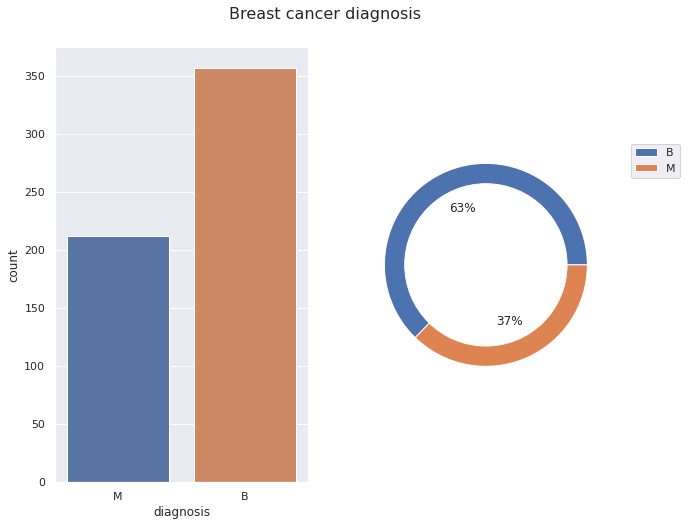

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize= (10, 8))
plt.suptitle('Breast cancer diagnosis', fontsize= 16, y= 0.95)
ax11 = sns.countplot(data= data, x= 'diagnosis', ax= ax1)
ax2.pie(data['diagnosis'].value_counts(normalize= True), autopct= '%.0f%%')
plt.legend(['B', 'M'], bbox_to_anchor= (1.05, 1))
# a partir daqui, código para adicionar círculo branco no meio do gráfico.
my_circle = plt.Circle((0, 0), 0.8, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

The majority of diagnosis shows benign tumors (63%).

## Column `radius_mean`

### Average, median and mode

In [7]:
pd.DataFrame({'Average': data['radius_mean'].mean().round(2),
              'Median': data['radius_mean'].median().round(2),
              'Mode': data['radius_mean'].mode()[0]},
             index= [0])

,Average,Median,Mode
0,14.13,13.37,12.34


### Frequency distribution of `radius_mean`

Splitting data in benign to benign diagnosis and malignant to malignant diagnosis.

In [8]:
benign = data.query('diagnosis == "B"') # only data that contains benign diagnosis
malignant = data.query('diagnosis == "M"') # only data that contains malignant diagnosis

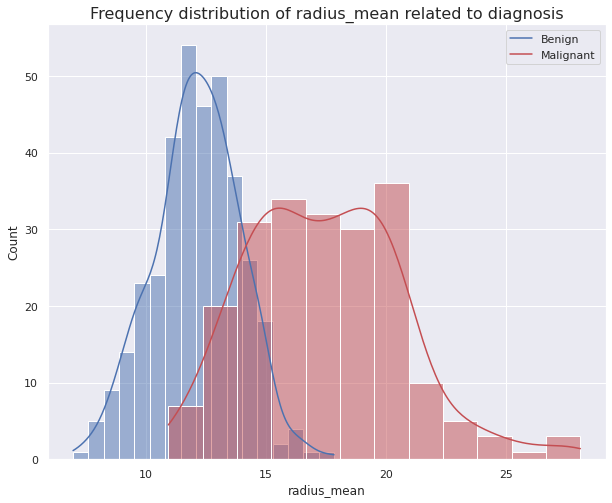

In [9]:
plt.figure(figsize= (10, 8))
sns.histplot(data= benign, x= 'radius_mean', kde= True)
sns.histplot(data= malignant, x= 'radius_mean', kde= True, color= 'r')
plt.title('Frequency distribution of radius_mean related to diagnosis', fontsize= 16)
plt.legend(['Benign', 'Malignant'])
plt.show()

Malignant tumors appear to have a larger radius than benign tumors.

### Boxplot and regplot

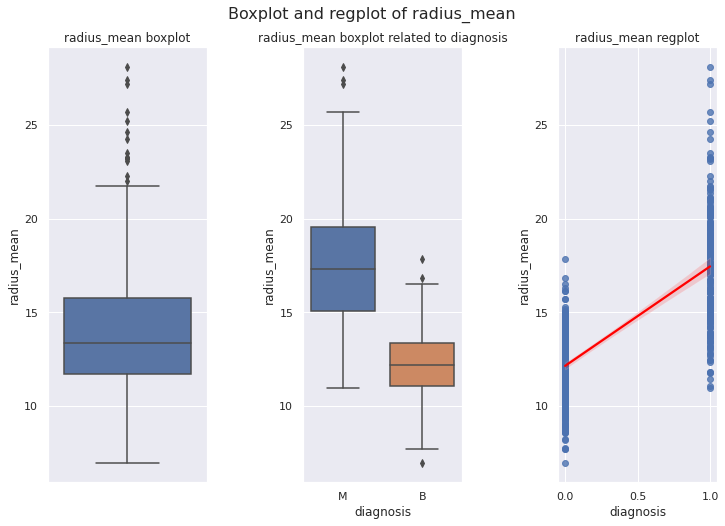

In [10]:
fig, axes = plt.subplots(1, 3, figsize= (12, 8))
plt.subplots_adjust(wspace= 0.6)
plt.suptitle('Boxplot and regplot of radius_mean', fontsize= 16, y= 0.95)
sns.boxplot(data= data, y= 'radius_mean', ax= axes[0])
axes[0].set_title('radius_mean boxplot')
sns.boxplot(data= data, x= 'diagnosis', y= 'radius_mean', ax= axes[1])
axes[1].set_title('radius_mean boxplot related to diagnosis')
sns.regplot(x= data['diagnosis'].map({'B': 0, 'M': 1}), y= data['radius_mean'], line_kws= {'color': 'red'}, ax= axes[2])
axes[2].set_title('radius_mean regplot')
plt.show()

The graphs confirms that malignant tumors tends to be bigger than benign tumors.

## Column `texture_mean`

### Average, median and mode

In [11]:
pd.DataFrame({'Average': data['texture_mean'].mean().round(2),
              'Median': data['texture_mean'].median().round(2),
              'Mode': data['texture_mean'].mode()[0]},
             index= [0])

,Average,Median,Mode
0,19.29,18.84,14.93


### Frequency distribution of `texture_mean`

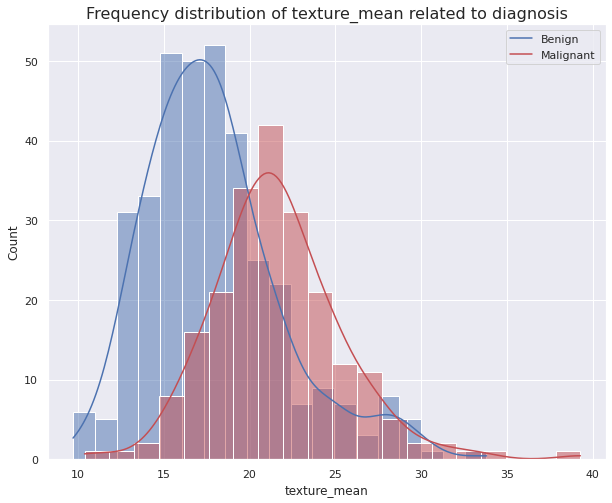

In [12]:
plt.figure(figsize= (10, 8))
sns.histplot(data= benign, x= 'texture_mean', kde= True)
sns.histplot(data= malignant, x= 'texture_mean', kde= True, color= 'r')
plt.title('Frequency distribution of texture_mean related to diagnosis', fontsize= 16)
plt.legend(['Benign', 'Malignant'])
plt.show()

### Boxplot and regplot

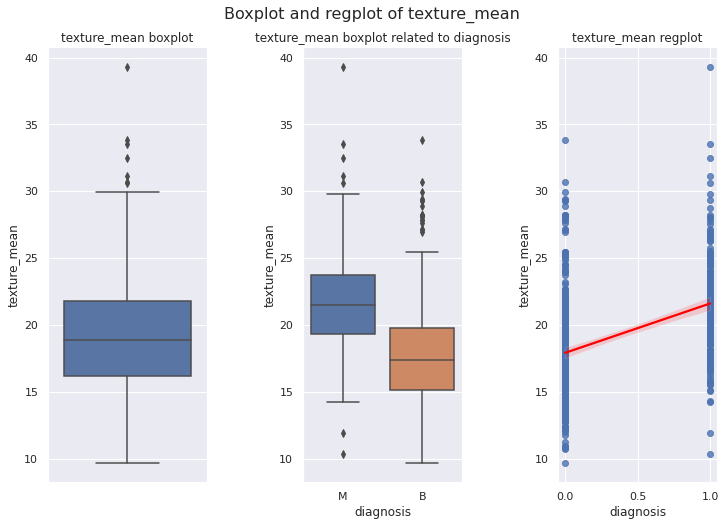

In [13]:
fig, axes = plt.subplots(1, 3, figsize= (12, 8))
plt.subplots_adjust(wspace= 0.6)
plt.suptitle('Boxplot and regplot of texture_mean', fontsize= 16, y= 0.95)
sns.boxplot(data= data, y= 'texture_mean', ax= axes[0])
axes[0].set_title('texture_mean boxplot')
sns.boxplot(data= data, x= 'diagnosis', y= 'texture_mean', ax= axes[1])
axes[1].set_title('texture_mean boxplot related to diagnosis')
sns.regplot(x= data['diagnosis'].map({'B': 0, 'M': 1}), y= data['texture_mean'], line_kws= {'color': 'red'}, ax= axes[2])
axes[2].set_title('texture_mean regplot')
plt.show()

Cells with bigger texture tends to be malignant.

## Column `perimeter_mean`

### Average, median and mode

In [14]:
pd.DataFrame({'Average': data['perimeter_mean'].mean().round(2),
              'Median': data['perimeter_mean'].median().round(2),
              'Mode': data['perimeter_mean'].mode().mean().round(2)},
             index= [0])

,Average,Median,Mode
0,91.97,86.24,101.69


### Frequency distribution of `perimeter_mean`

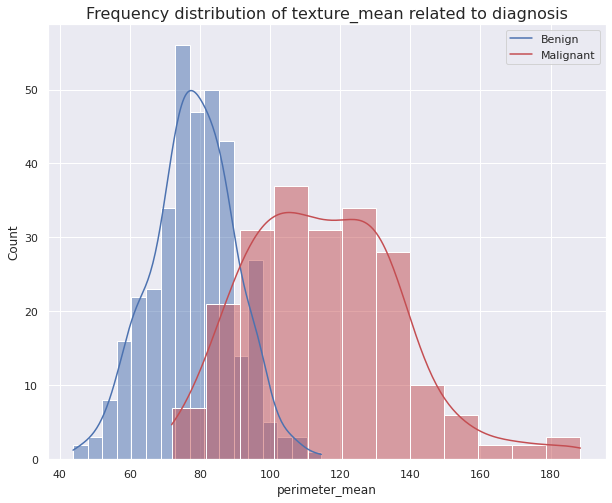

In [15]:
plt.figure(figsize= (10, 8))
sns.histplot(data= benign, x= 'perimeter_mean', kde= True)
sns.histplot(data= malignant, x= 'perimeter_mean', kde= True, color= 'r')
plt.title('Frequency distribution of texture_mean related to diagnosis', fontsize= 16)
plt.legend(['Benign', 'Malignant'])
plt.show()

### Boxplot and regplot

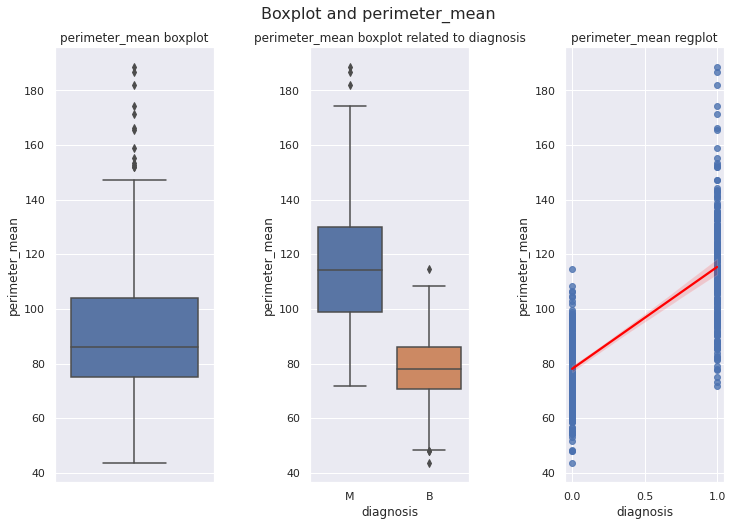

In [16]:
fig, axes = plt.subplots(1, 3, figsize= (12, 8))
plt.subplots_adjust(wspace= 0.6)
plt.suptitle('Boxplot and perimeter_mean', fontsize= 16, y= 0.95)
sns.boxplot(data= data, y= 'perimeter_mean', ax= axes[0])
axes[0].set_title('perimeter_mean boxplot')
sns.boxplot(data= data, x= 'diagnosis', y= 'perimeter_mean', ax= axes[1])
axes[1].set_title('perimeter_mean boxplot related to diagnosis')
sns.regplot(x= data['diagnosis'].map({'B': 0, 'M': 1}), y= data['perimeter_mean'], line_kws= {'color': 'red'}, ax= axes[2])
axes[2].set_title('perimeter_mean regplot')
plt.show()

Cells with larger perimeter tend to be malignant.

## Column `area_mean`

### Average, median and mode

In [17]:
pd.DataFrame({'Average': data['area_mean'].mean().round(2),
              'Median': data['area_mean'].mean().round(2),
              'Mode': data['area_mean'].mode().mean().round(2)},
             index= [0])

,Average,Median,Mode
0,654.89,654.89,512.2


### Frequency distribution of `area_mean`

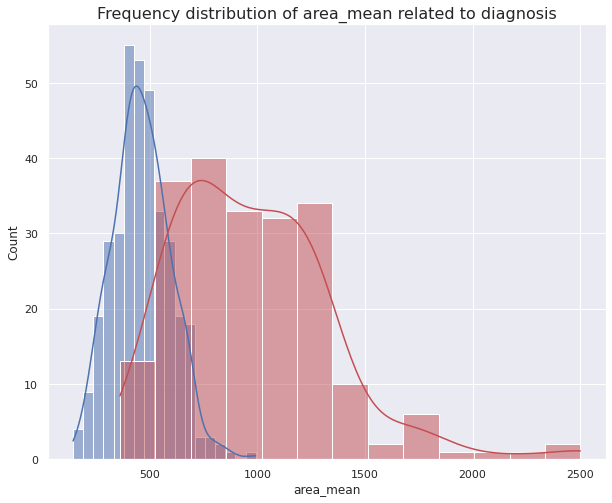

In [18]:
plt.figure(figsize= (10, 8))
sns.histplot(data= benign, x= 'area_mean', kde= True)
sns.histplot(data= malignant, x= 'area_mean', kde= True, color= 'r')
plt.title('Frequency distribution of area_mean related to diagnosis', fontsize= 16)
plt.show()

### Boxplot and regplot 

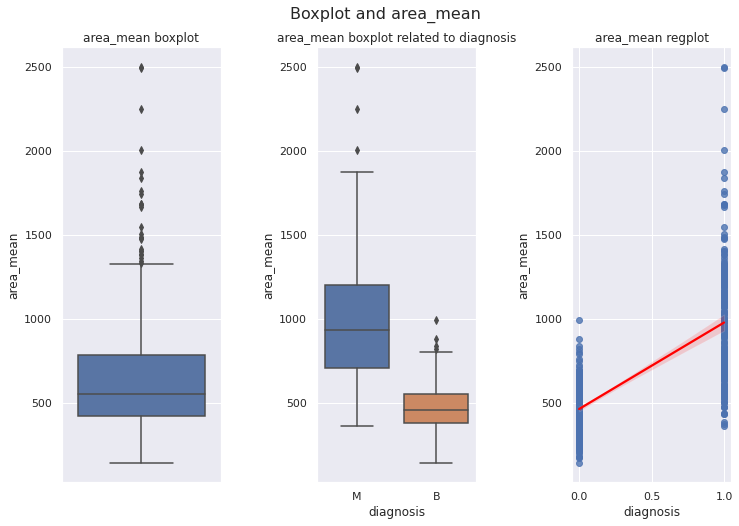

In [19]:
fig, axes = plt.subplots(1, 3, figsize= (12, 8))
plt.subplots_adjust(wspace= 0.6)
plt.suptitle('Boxplot and area_mean', fontsize= 16, y= 0.95)
sns.boxplot(data= data, y= 'area_mean', ax= axes[0])
axes[0].set_title('area_mean boxplot')
sns.boxplot(data= data, x= 'diagnosis', y= 'area_mean', ax= axes[1])
axes[1].set_title('area_mean boxplot related to diagnosis')
sns.regplot(x= data['diagnosis'].map({'B': 0, 'M': 1}), y= data['area_mean'], line_kws= {'color': 'red'}, ax= axes[2])
axes[2].set_title('area_mean regplot')
plt.show()

Cells with larger area tend to be malignant.

## Column `smoothness_mean`

### Average, median and mode

In [20]:
pd.DataFrame({'Average': data['smoothness_mean'].mean().round(2),
              'Median': data['smoothness_mean'].median().round(2),
              'Mode': data['smoothness_mean'].mode().mean().round(2)},
             index= [0])

,Average,Median,Mode
0,0.1,0.1,0.1


### Frequency distribution of `smoothness_mean`

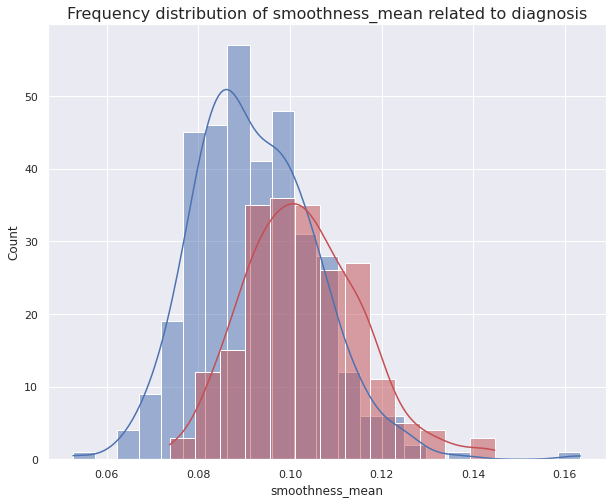

In [21]:
plt.figure(figsize= (10, 8))
sns.histplot(data= benign, x= 'smoothness_mean', kde= True)
sns.histplot(data= malignant, x= 'smoothness_mean', kde= True, color= 'r')
plt.title('Frequency distribution of smoothness_mean related to diagnosis', fontsize= 16)
plt.show()

### Boxplot and regplot

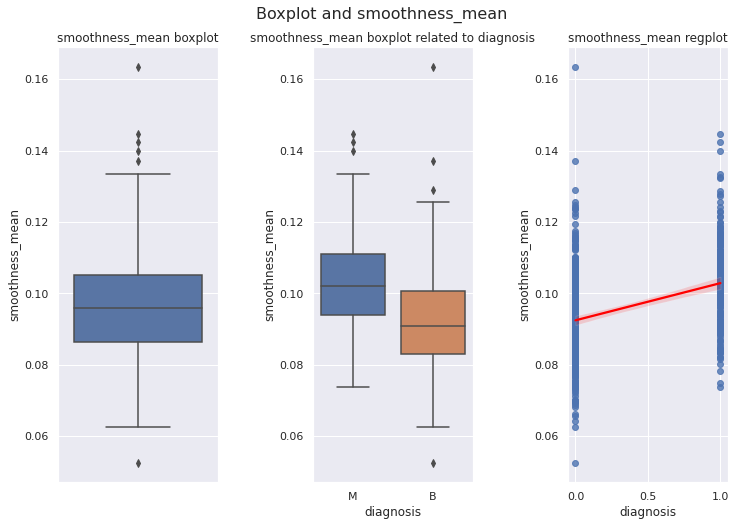

In [22]:
fig, axes = plt.subplots(1, 3, figsize= (12, 8))
plt.subplots_adjust(wspace= 0.6)
plt.suptitle('Boxplot and smoothness_mean', fontsize= 16, y= 0.95)
sns.boxplot(data= data, y= 'smoothness_mean', ax= axes[0])
axes[0].set_title('smoothness_mean boxplot')
sns.boxplot(data= data, x= 'diagnosis', y= 'smoothness_mean', ax= axes[1])
axes[1].set_title('smoothness_mean boxplot related to diagnosis')
sns.regplot(x= data['diagnosis'].map({'B': 0, 'M': 1}), y= data['smoothness_mean'], line_kws= {'color': 'red'}, ax= axes[2])
axes[2].set_title('smoothness_mean regplot')
plt.show()

Cells with larger smoothness tend to be malignant.

## Column `compactness_mean`

### Average, median and mode

In [23]:
data['compactness_mean'].mode()

0    0.1147
1    0.1206
dtype: float64

In [24]:
pd.DataFrame({'Average': data['compactness_mean'].mean().round(2),
              'Median': data['compactness_mean'].median().round(2),
              'Mode': data['compactness_mean'].mode().mean().round(2)},
             index= [0])

,Average,Median,Mode
0,0.1,0.09,0.12


### Frequency distribution of `compactness_mean`

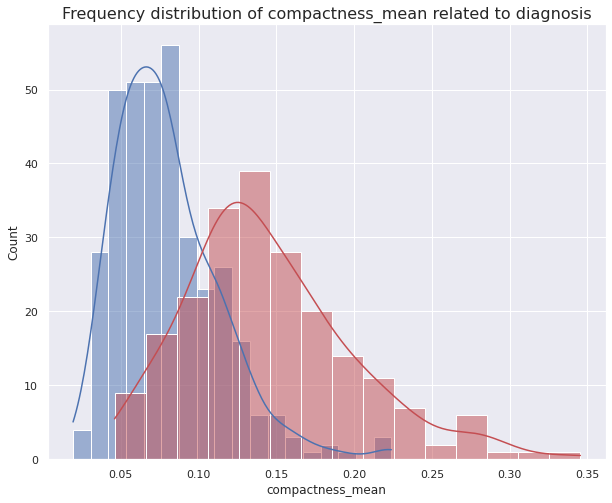

In [25]:
plt.figure(figsize= (10, 8))
sns.histplot(data= benign, x= 'compactness_mean', kde= True)
sns.histplot(data= malignant, x= 'compactness_mean', kde= True, color= 'r')
plt.title('Frequency distribution of compactness_mean related to diagnosis', fontsize= 16)
plt.show()

### Boxplot and regplot

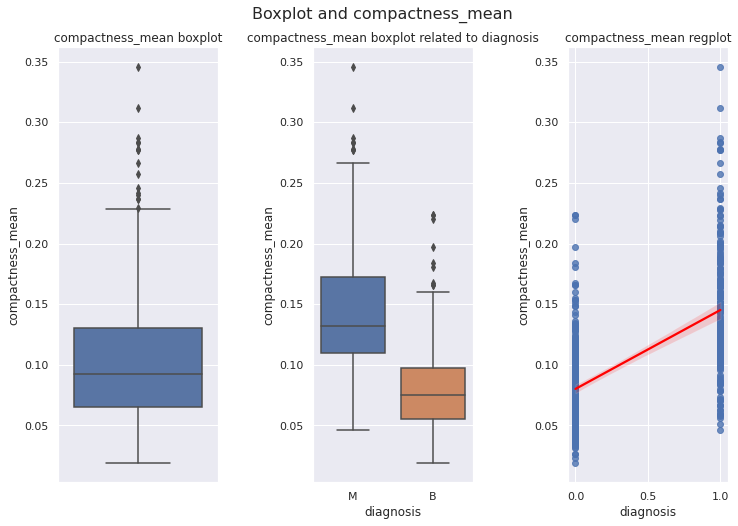

In [26]:
fig, axes = plt.subplots(1, 3, figsize= (12, 8))
plt.subplots_adjust(wspace= 0.6)
plt.suptitle('Boxplot and compactness_mean', fontsize= 16, y= 0.95)
sns.boxplot(data= data, y= 'compactness_mean', ax= axes[0])
axes[0].set_title('compactness_mean boxplot')
sns.boxplot(data= data, x= 'diagnosis', y= 'compactness_mean', ax= axes[1])
axes[1].set_title('compactness_mean boxplot related to diagnosis')
sns.regplot(x= data['diagnosis'].map({'B': 0, 'M': 1}), y= data['compactness_mean'], line_kws= {'color': 'red'}, ax= axes[2])
axes[2].set_title('compactness_mean regplot')
plt.show()

Cells with more compactness tend to be malignant.

## Column `concavity_mean`

In [27]:
pd.DataFrame({'Average': data['concavity_mean'].mean().round(2),
              'Median': data['concavity_mean'].median().round(2),
              'Mode': data['concavity_mean'].mode().mean().round(2)},
             index= [0])

,Average,Median,Mode
0,0.09,0.06,0.0


### Frequency distribution of `concavity_mean`

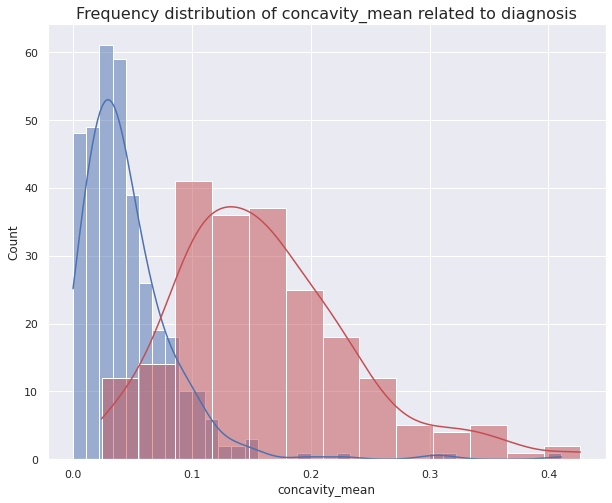

In [28]:
plt.figure(figsize= (10, 8))
sns.histplot(data= benign, x= 'concavity_mean', kde= True)
sns.histplot(data= malignant, x= 'concavity_mean', kde= True, color= 'r')
plt.title('Frequency distribution of concavity_mean related to diagnosis', fontsize= 16)
plt.show()

### Boxplot and regplot

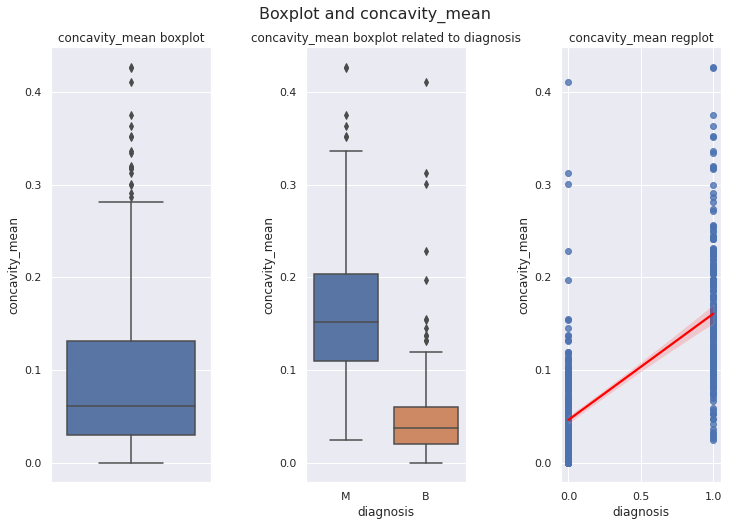

In [29]:
fig, axes = plt.subplots(1, 3, figsize= (12, 8))
plt.subplots_adjust(wspace= 0.6)
plt.suptitle('Boxplot and concavity_mean', fontsize= 16, y= 0.95)
sns.boxplot(data= data, y= 'concavity_mean', ax= axes[0])
axes[0].set_title('concavity_mean boxplot')
sns.boxplot(data= data, x= 'diagnosis', y= 'concavity_mean', ax= axes[1])
axes[1].set_title('concavity_mean boxplot related to diagnosis')
sns.regplot(x= data['diagnosis'].map({'B': 0, 'M': 1}), y= data['concavity_mean'], line_kws= {'color': 'red'}, ax= axes[2])
axes[2].set_title('concavity_mean regplot')
plt.show()

More concave cells tend to be malignant.

## Column `concave points_mean`

### Average, median and mode

In [30]:
pd.DataFrame({'Average': data['concave points_mean'].mean().round(2),
              'Median': data['concave points_mean'].median().round(2),
              'Mode': data['concave points_mean'].mode().mean().round(2)}, 
             index= [0])

,Average,Median,Mode
0,0.05,0.03,0.0


### Frequency distribution of `concave points_mean`

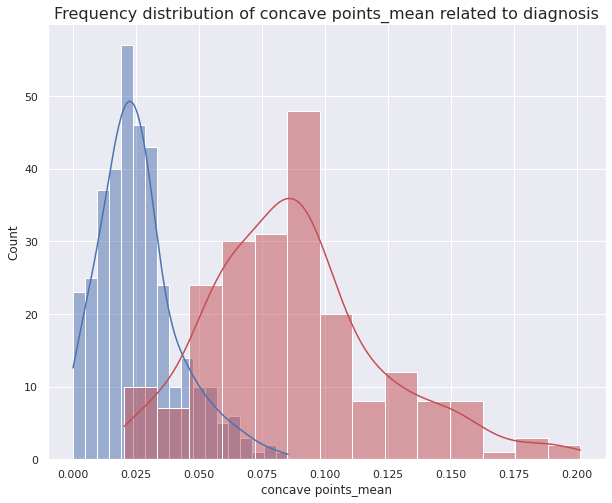

In [31]:
plt.figure(figsize= (10, 8))
sns.histplot(data= benign, x= 'concave points_mean', kde= True)
sns.histplot(data= malignant, x= 'concave points_mean', kde= True, color= 'r')
plt.title('Frequency distribution of concave points_mean related to diagnosis', fontsize= 16)
plt.show()

### Boxplot and regplot

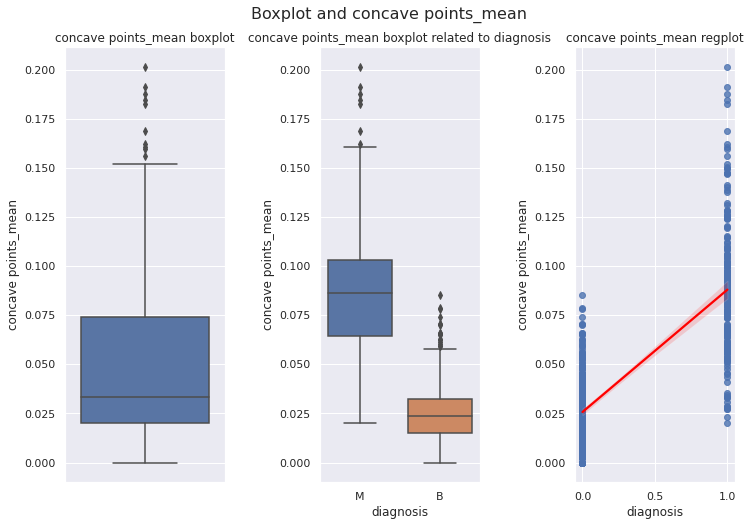

In [32]:
fig, axes = plt.subplots(1, 3, figsize= (12, 8))
plt.subplots_adjust(wspace= 0.6)
plt.suptitle('Boxplot and concave points_mean', fontsize= 16, y= 0.95)
sns.boxplot(data= data, y= 'concave points_mean', ax= axes[0])
axes[0].set_title('concave points_mean boxplot')
sns.boxplot(data= data, x= 'diagnosis', y= 'concave points_mean', ax= axes[1])
axes[1].set_title('concave points_mean boxplot related to diagnosis')
sns.regplot(x= data['diagnosis'].map({'B': 0, 'M': 1}), y= data['concave points_mean'], line_kws= {'color': 'red'}, ax= axes[2])
axes[2].set_title('concave points_mean regplot')
plt.show()

Cells with more concave points tend to be malignant.

## Column `symmetry_mean`

### Average, median and mode

In [33]:
pd.DataFrame({'Average': data['symmetry_mean'].mean().round(2),
              'Median': data['symmetry_mean'].median().round(2),
              'Mode': data['symmetry_mean'].mode().mean().round(2)},
             index= [0])

,Average,Median,Mode
0,0.18,0.18,0.17


### Frequency distribution of `symmetry_mean`

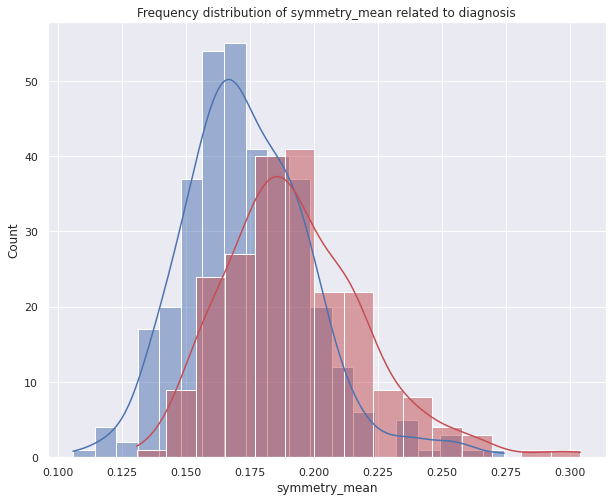

In [34]:
plt.figure(figsize= (10, 8))
sns.histplot(data= benign, x= 'symmetry_mean', kde= True)
sns.histplot(data= malignant, x= 'symmetry_mean', kde= True, color= 'r')
plt.title('Frequency distribution of symmetry_mean related to diagnosis')
plt.show()

### Boxplot and regplot

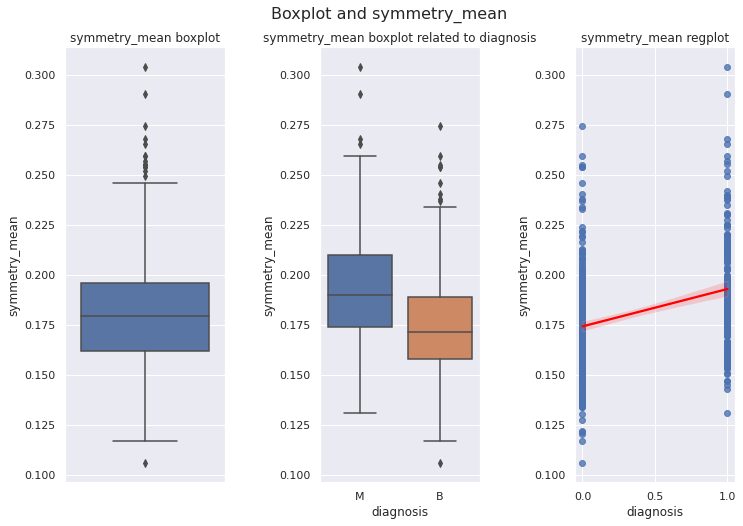

In [35]:
fig, axes = plt.subplots(1, 3, figsize= (12, 8))
plt.subplots_adjust(wspace= 0.6)
plt.suptitle('Boxplot and symmetry_mean', fontsize= 16, y= 0.95)
sns.boxplot(data= data, y= 'symmetry_mean', ax= axes[0])
axes[0].set_title('symmetry_mean boxplot')
sns.boxplot(data= data, x= 'diagnosis', y= 'symmetry_mean', ax= axes[1])
axes[1].set_title('symmetry_mean boxplot related to diagnosis')
sns.regplot(x= data['diagnosis'].map({'B': 0, 'M': 1}), y= data['symmetry_mean'], line_kws= {'color': 'red'}, ax= axes[2])
axes[2].set_title('symmetry_mean regplot')
plt.show()

Cells with more symmetry points tend to be malignant.

## Column `fractal_dimension_mean`

### Average, median and mode

In [36]:
pd.DataFrame({'Average': data['fractal_dimension_mean'].mean().round(2),
              'Median': data['fractal_dimension_mean'].median().round(2),
              'Mode': data['fractal_dimension_mean'].mode().mean().round(2)},
             index= [0])

,Average,Median,Mode
0,0.06,0.06,0.06


### Frequency distribution of `fractal_dimension_mean`

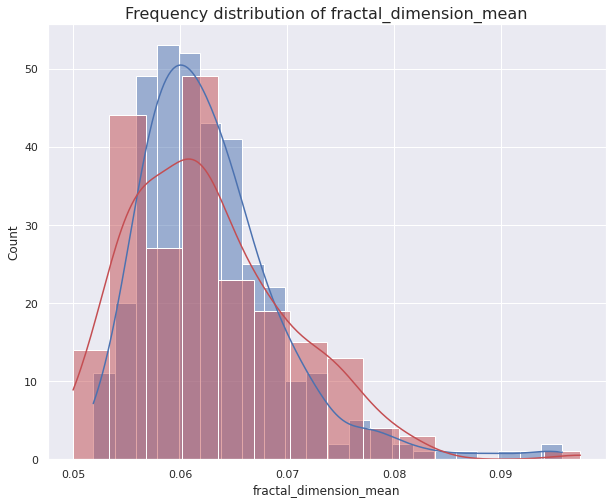

In [37]:
plt.figure(figsize= (10, 8))
sns.histplot(data= benign, x= 'fractal_dimension_mean', kde= True)
sns.histplot(data= malignant, x= 'fractal_dimension_mean', kde= True, color= 'r')
plt.title('Frequency distribution of fractal_dimension_mean', fontsize= 16)
plt.show()

### Boxplot and regplot

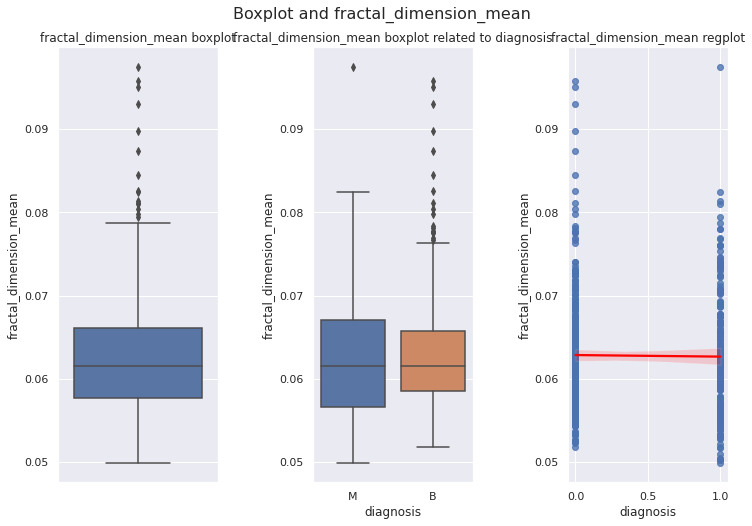

In [38]:
fig, axes = plt.subplots(1, 3, figsize= (12, 8))
plt.subplots_adjust(wspace= 0.6)
plt.suptitle('Boxplot and fractal_dimension_mean', fontsize= 16, y= 0.95)
sns.boxplot(data= data, y= 'fractal_dimension_mean', ax= axes[0])
axes[0].set_title('fractal_dimension_mean boxplot')
sns.boxplot(data= data, x= 'diagnosis', y= 'fractal_dimension_mean', ax= axes[1])
axes[1].set_title('fractal_dimension_mean boxplot related to diagnosis')
sns.regplot(x= data['diagnosis'].map({'B': 0, 'M': 1}), y= data['fractal_dimension_mean'], line_kws= {'color': 'red'}, ax= axes[2])
axes[2].set_title('fractal_dimension_mean regplot')
plt.show()

The variable fractal dimension does not seem to be decisive to define the type of tumor.

# Frequency distribution of variables

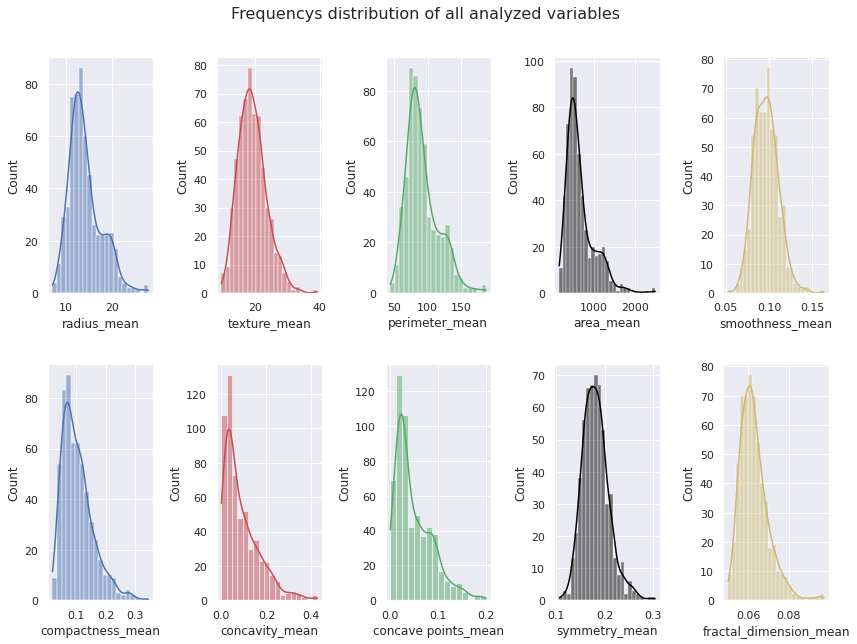

In [39]:
fig, axes = plt.subplots(2, 5, figsize= (14, 10))
plt.suptitle('Frequencys distribution of all analyzed variables', fontsize= 16,  y= 0.95)
plt.subplots_adjust(hspace= 0.3, wspace= 0.6)
sns.histplot(data= data, x= 'radius_mean', kde= True, ax= axes[0, 0])
sns.histplot(data= data, x= 'texture_mean', kde= True, ax= axes[0, 1], color= 'r')
sns.histplot(data= data, x= 'perimeter_mean', kde= True, ax= axes[0, 2], color= 'g')
sns.histplot(data= data, x= 'area_mean', kde= True, ax= axes[0, 3], color= 'black')
sns.histplot(data= data, x= 'smoothness_mean', kde= True, ax= axes[0, 4], color= 'y')
sns.histplot(data= data, x= 'compactness_mean', kde= True, ax= axes[1, 0])
sns.histplot(data= data, x= 'concavity_mean', kde= True, ax= axes[1, 1], color= 'r')
sns.histplot(data= data, x= 'concave points_mean', kde= True, ax= axes[1, 2], color= 'g')
sns.histplot(data= data, x= 'symmetry_mean', kde= True, ax= axes[1, 3], color= 'black')
sns.histplot(data= data, x= 'fractal_dimension_mean', kde= True, ax= axes[1, 4], color= 'y')
plt.show()

## Some graph analysis of independent variables

To do some of analysis that are needed, it is possible convert values of variable `diagnosis` to numeric values (0, 1):

In [40]:
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

### Analysys

#### `radius_mean` and `perimeter_mean`

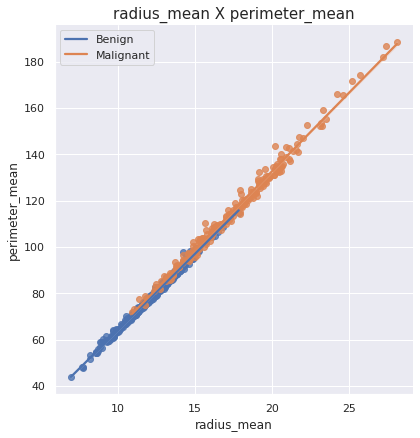

In [68]:
sns.lmplot(data= data, x= 'radius_mean', y= 'perimeter_mean', hue= 'diagnosis', height= 6, legend= False)
plt.title('radius_mean X perimeter_mean', fontsize= 15)
plt.legend(['Benign', 'Malignant'])
plt.show()

The perimeter of tumoral cell grows with radius. Malignant cells at a higher level than benign ones.

#### `area_mean` and `symmetry_mean`

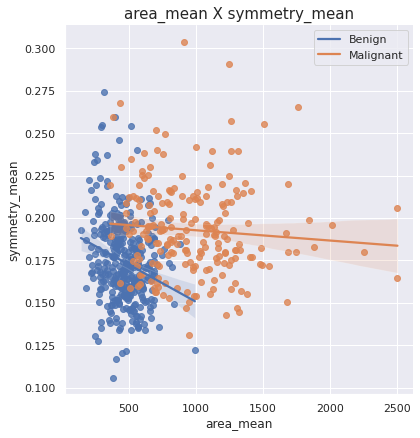

In [69]:
sns.lmplot(data= data, x= 'area_mean', y= 'symmetry_mean', hue= 'diagnosis', height= 6, legend= False)
plt.title('area_mean X symmetry_mean', fontsize= 15)
plt.legend(['Benign', 'Malignant'])
plt.show()

Symmetry tend to be lower in cells with larger area. The drop is more pronounced in benign tumors.

#### `area_mean` and `concavity_mean`

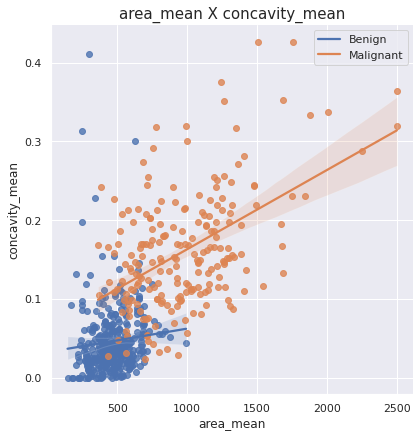

In [71]:
sns.lmplot(data= data, x= 'area_mean', y= 'concavity_mean', hue= 'diagnosis', height= 6, legend= False)
plt.title('area_mean X concavity_mean', fontsize= 15)
plt.legend(['Benign', 'Malignant'])
plt.show()

Tumoral cells with larger area have greater concavity. Malignant cells at a higher level.

# Correlation analysis

In [ ]:
data.corr().round(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.00,0.04,0.07,0.10,0.07,0.10,-0.01,0.00,0.05,0.04,...,0.08,0.06,0.08,0.11,0.01,-0.00,0.02,0.04,-0.04,-0.03
diagnosis,0.04,1.00,0.73,0.42,0.74,0.71,0.36,0.60,0.70,0.78,...,0.78,0.46,0.78,0.73,0.42,0.59,0.66,0.79,0.42,0.32
radius_mean,0.07,0.73,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,...,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01
texture_mean,0.10,0.42,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,...,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12
perimeter_mean,0.07,0.74,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,...,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
area_mean,0.10,0.71,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,...,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
smoothness_mean,-0.01,0.36,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,...,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50
compactness_mean,0.00,0.60,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,...,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
concavity_mean,0.05,0.70,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,...,0.69,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
concave points_mean,0.04,0.78,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,...,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37


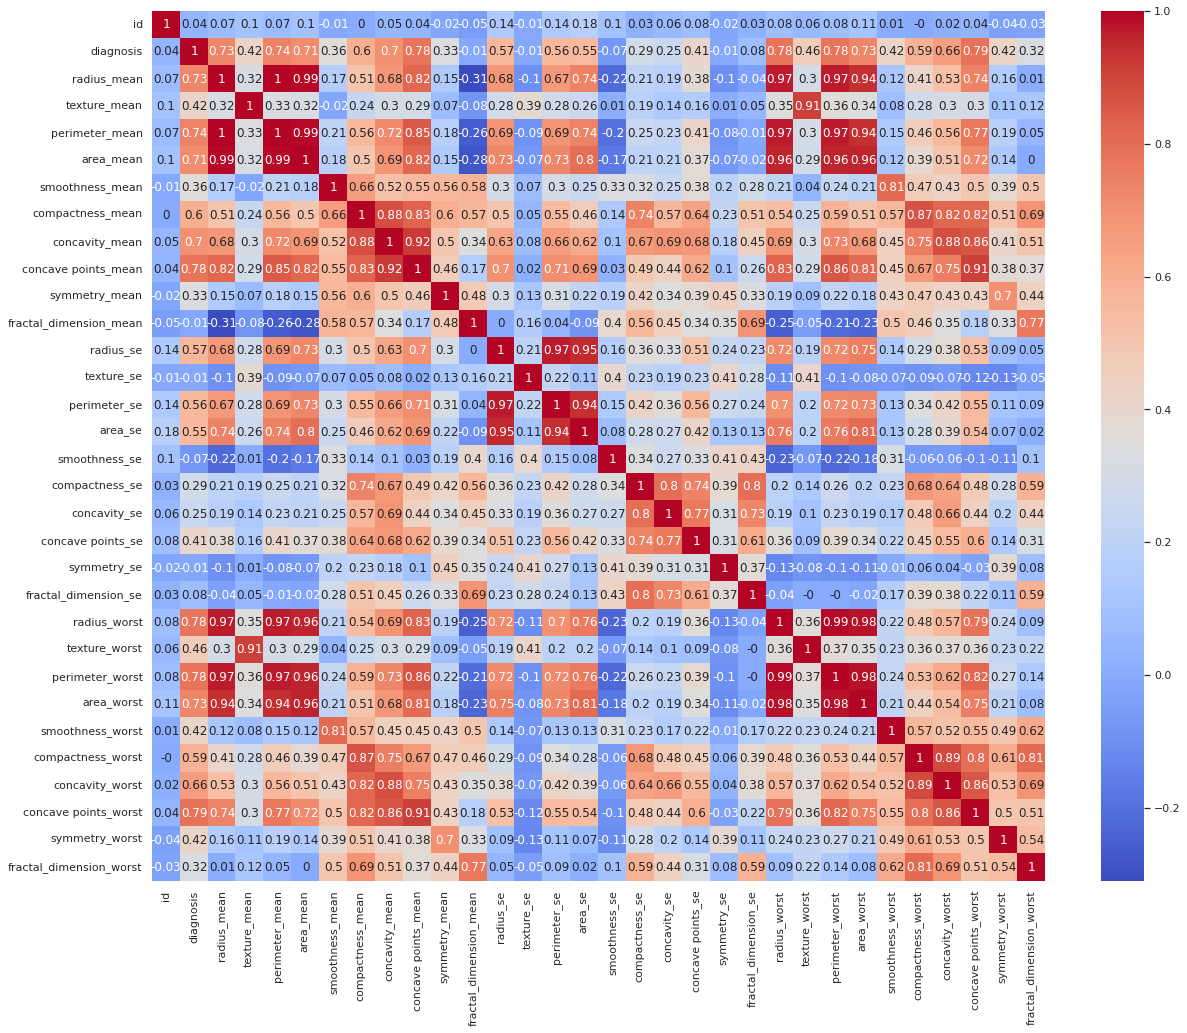

In [ ]:
plt.figure(figsize= (20, 16))
sns.heatmap(data.corr().round(2), annot= True, cmap= 'coolwarm')
plt.show()

# Machine learning model

## Splitting data in train and test dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop('diagnosis', axis= 1)

In [ ]:
y = data['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

## Data normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

## Naive Bayes model

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
naive = GaussianNB()

In [ ]:
naive.fit(X_train, y_train)

GaussianNB()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
y_nb_predict = naive.predict(X_test)

In [ ]:
accuracy_score(y_test, y_nb_predict)

0.935672514619883

In [ ]:
confusion_matrix(y_test, y_nb_predict)

array([[103,   5],
       [  6,  57]])

In [ ]:
print(classification_report(y_test, y_nb_predict))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       108
           1       0.92      0.90      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



## Linear regression model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(random_state= 42, max_iter= 100, tol= 0.0001, penalty= 'l2', C= 1, solver= 'lbfgs')

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression(C=1, random_state=42)

In [ ]:
y_predict = lr.predict(X_test)

In [ ]:
accuracy_score(y_test, y_predict)

0.9649122807017544

In [ ]:
confusion_matrix(y_test, y_predict)

array([[107,   1],
       [  5,  58]])

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       108
           1       0.98      0.92      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



## Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random = RandomForestClassifier(n_estimators= 100, criterion= 'entropy', random_state= 42)

In [ ]:
random.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [ ]:
y_rf_predict = random.predict(X_test)

In [ ]:
accuracy_score(y_test, y_nb_predict)

0.935672514619883